In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
data = pd.read_csv('BankChurners.csv')

In [226]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [228]:
data.shape

(10127, 23)

In [229]:
data = data.iloc[:, :21]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [230]:
data.shape

(10127, 21)

In [231]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

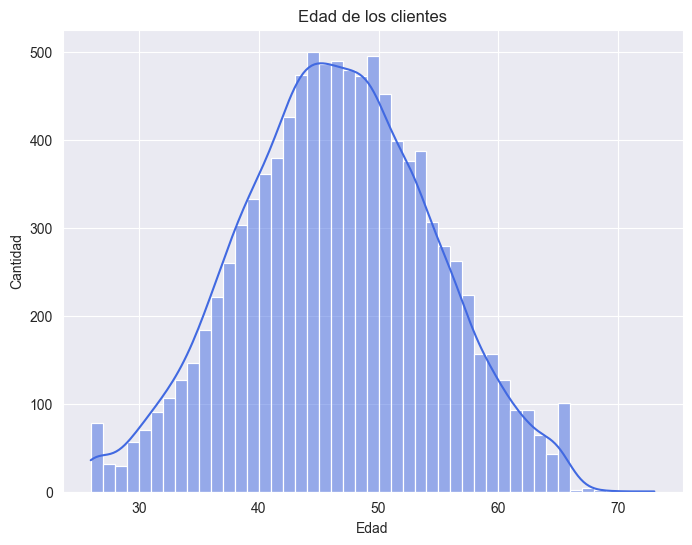

In [232]:
plt.figure(figsize=(8, 6))

sns.histplot(data["Customer_Age"],kde=True,color="royalblue")
plt.title('Edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

In [233]:
counts = data.groupby(['Gender', 'Attrition_Flag']).size().reset_index(name='Frecuencia')
counts

,Gender,Attrition_Flag,Frecuencia
0,F,Attrited Customer,930
1,F,Existing Customer,4428
2,M,Attrited Customer,697
3,M,Existing Customer,4072


<Figure size 1600x1000 with 0 Axes>

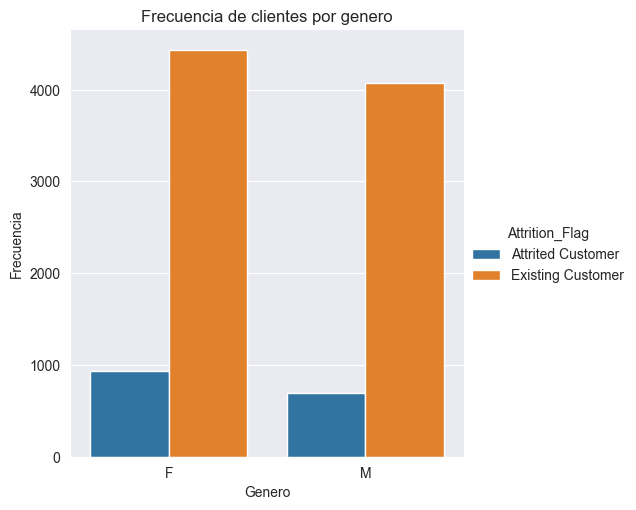

In [234]:
plt.figure(figsize=(16, 10))
sns.catplot(x='Gender', y='Frecuencia', hue='Attrition_Flag', data=counts, kind='bar')
plt.title('Frecuencia de clientes por genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.show()

In [235]:
counts = data.groupby(['Education_Level', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Education_Level,Attrition_Flag,Frequency
0,College,Attrited Customer,154
1,College,Existing Customer,859
2,Doctorate,Attrited Customer,95
3,Doctorate,Existing Customer,356
4,Graduate,Attrited Customer,487
5,Graduate,Existing Customer,2641
6,High School,Attrited Customer,306
7,High School,Existing Customer,1707
8,Post-Graduate,Attrited Customer,92
9,Post-Graduate,Existing Customer,424


<Figure size 4000x1000 with 0 Axes>

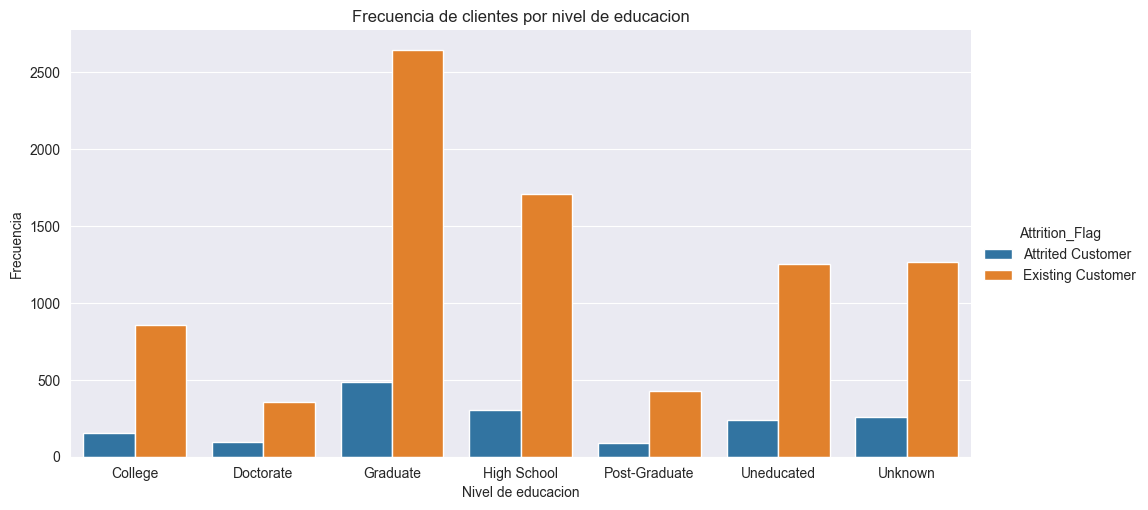

In [236]:
plt.figure(figsize=(40, 10))
sns.catplot(x='Education_Level', y='Frequency', hue='Attrition_Flag', data=counts, kind='bar', aspect=2)
plt.title('Frecuencia de clientes por nivel de educacion')
plt.xlabel('Nivel de educacion')
plt.ylabel('Frecuencia')
plt.show()

In [237]:
counts = data.groupby(['Income_Category', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Income_Category,Attrition_Flag,Frequency
0,$120K +,Attrited Customer,126
1,$120K +,Existing Customer,601
2,$40K - $60K,Attrited Customer,271
3,$40K - $60K,Existing Customer,1519
4,$60K - $80K,Attrited Customer,189
5,$60K - $80K,Existing Customer,1213
6,$80K - $120K,Attrited Customer,242
7,$80K - $120K,Existing Customer,1293
8,Less than $40K,Attrited Customer,612
9,Less than $40K,Existing Customer,2949


<Figure size 1000x800 with 0 Axes>

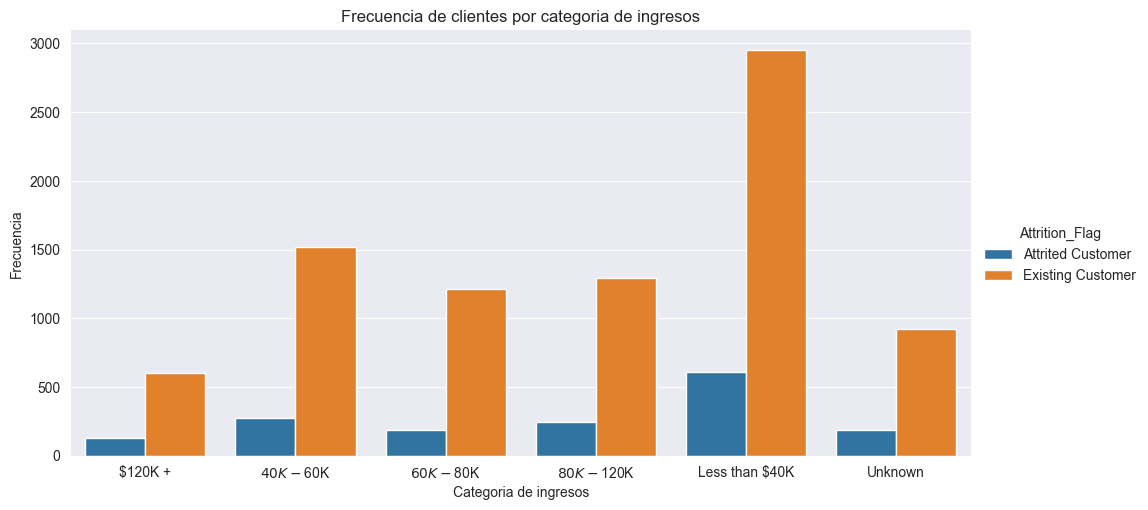

In [238]:
plt.figure(figsize=(10, 8))
sns.catplot(x='Income_Category', y='Frequency', hue='Attrition_Flag', data=counts, kind='bar', aspect=2)
plt.title('Frecuencia de clientes por categoria de ingresos')
plt.xlabel('Categoria de ingresos')
plt.ylabel('Frecuencia')
plt.show()


# Definiendo el target

In [239]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':1, 'Attrited Customer':0})
data['Attrition_Flag'].head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

# HEATMAP

In [240]:
numeric_cols = data.select_dtypes(include=['number']).columns
df_numeric = data[numeric_cols]
correlation_matrix = df_numeric.corr()

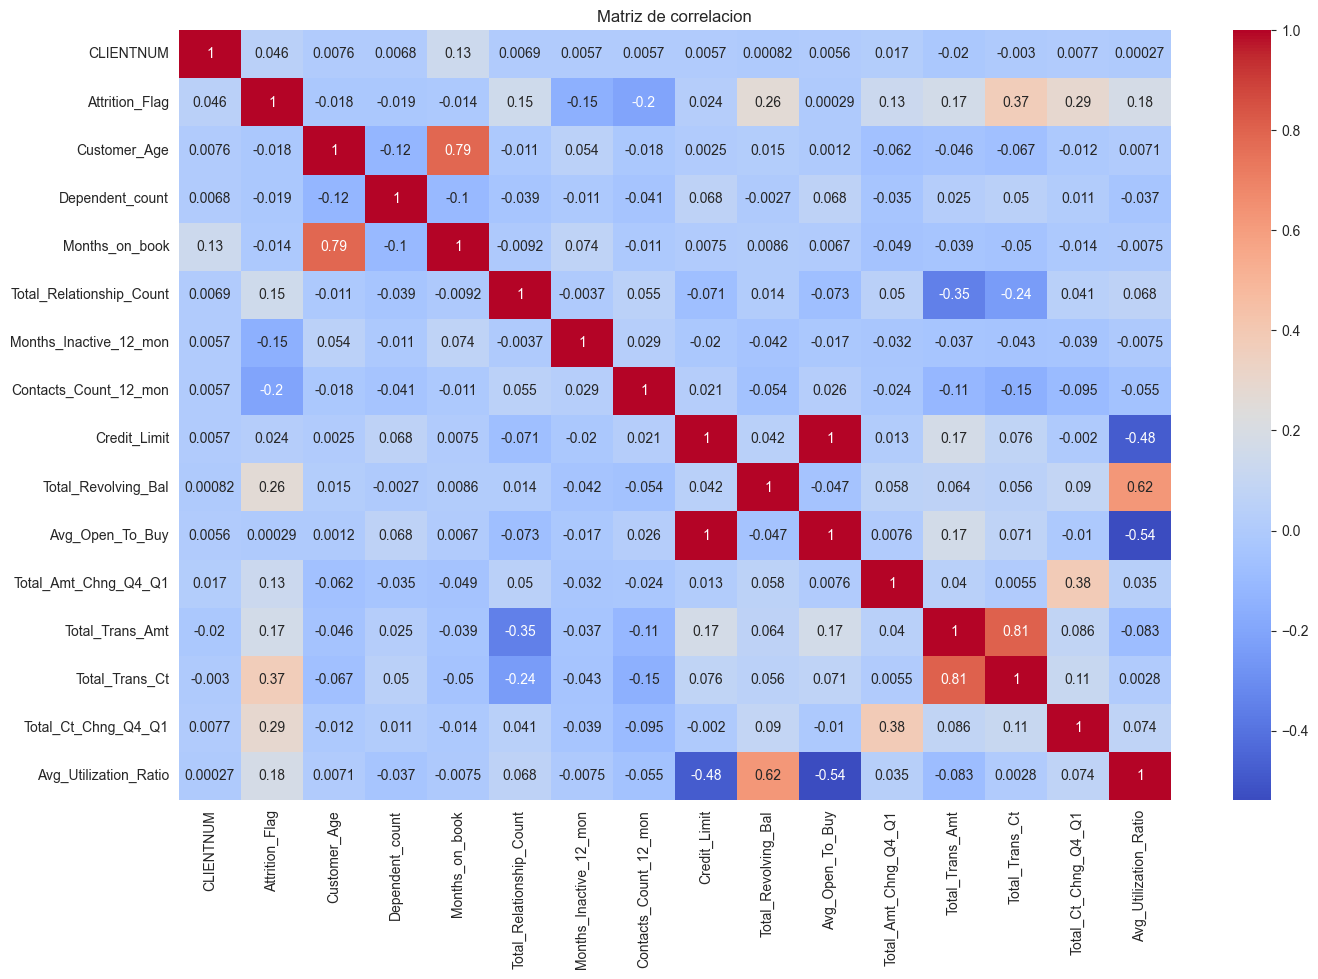

In [241]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

# Procesando la data

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [243]:
X, Y = data.drop(['Attrition_Flag'], axis=1), data['Attrition_Flag']

In [244]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=.2,random_state=42, stratify=Y)

In [245]:
# Convertimos las variables categoricas en numericas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.fit_transform(X_test[col])

In [246]:
# Normalizamos la data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELANDO

In [247]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [248]:
y_pred = model.predict(X_test)

In [249]:
from sklearn.metrics import confusion_matrix

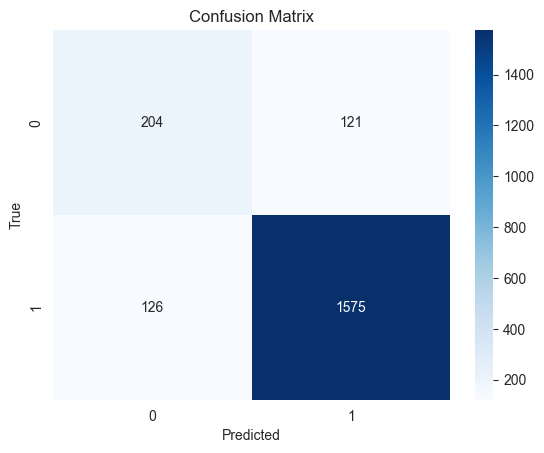

In [250]:
sns.heatmap(confusion_matrix(Y_test, y_pred)
, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

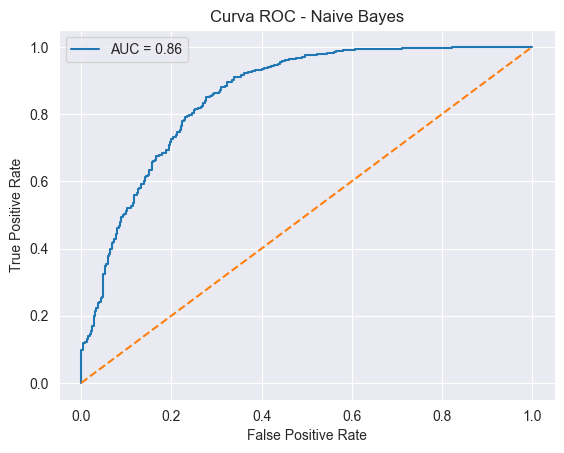

In [251]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtiene las probabilidades de la clase positiva (1)
y_prob = model.predict_proba(X_test)[:, 1]
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
# Calcula el AUC
auc_score = roc_auc_score(Y_test, y_prob)

# Grafica la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()